In [16]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_ReInit"): print("\nThe data folder \"_data_ReInit\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_ReInit/"); 
    path_data = path_notebook + "/_data_ReInit/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class2D/_data_ReInit/


In [22]:
os.chdir(path_notebook); reload(MFI_class2D); reload(lib2); pass

## Invernizzi Potential

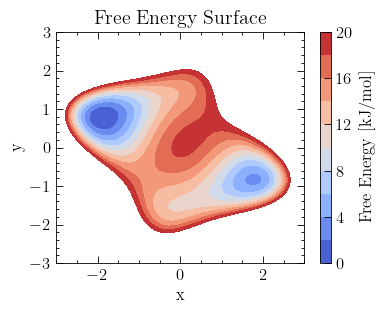

In [17]:
# Define the grid, the potential, the string of the potential and the FES cutoff
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)
inve_pot_string = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"
FES_cutoff = 20

# Define plumed grid
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

# plot the free energy surface
plt.contourf(X, Y, inve_pot, levels=np.linspace(0, FES_cutoff, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

# Stimulation path
path_invernizzi = path_data + "Invernizzi_Potential/"

In [19]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, "bw":[0.1, 0.1],
                    "plX":plX, "plY":plY, "simulation_steps":1_000_000, 
                    "position_pace":20, "n_pos_per_window":10, "metad_pace":200, "metad_width":[0.1, 0.1], "metad_height":3, "biasfactor":10,
                    "Bias_sf":1, "gaus_filter_sigma":None,
                    "FES_cutoff":FES_cutoff, # "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    "record_maps":True, "record_forces_e":False, "simulation_folder_path": path_invernizzi, "ID":"", 					
                    }
                  

### 1st simulation and analysis

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running simulation with System = Langevin2D: n_steps=500,000, ipos=-2.19,-0.822, Pos_t=20, T=1, t_Tot=2.50ns
sigma=[0.1,0.1], h=3, bf=10, Gaus_t=200 

| 100% | Simulated time: 2.5ns | Total time: 5 sec | Finished at 21:19:12                                                         

Langevin2D simulation finished in 5 sec.


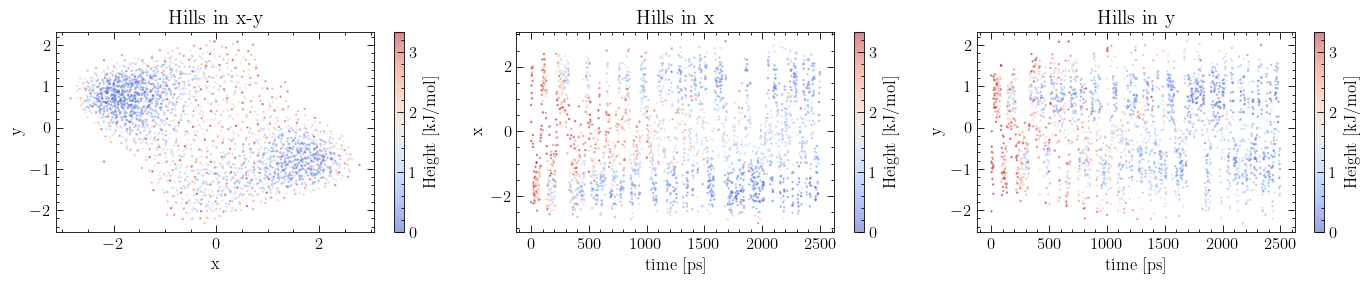

| 100% | AAD: 0.695 [kJ/mol] | Total time: 3 sec                                                            


In [23]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "ID":"_inve"})
new_params.update({"metad_height":3, "biasfactor":10, "metad_width":[0.1, 0.1]})
# os.chdir(path_class+"simulation_folder")

MFI = MFI_class2D.MFI2D(**new_params)

MFI.run_simulation()
os.system("rm bck.* stats.out")

MFI.load_data(); lib2.plot_hills_trajectory(MFI.hills)

MFI.analyse_data()
t1, v1, aofe1, aad1 = MFI.Avr_Error_list[:,0], MFI.Avr_Error_list[:,1], MFI.Avr_Error_list[:,2], MFI.Avr_Error_list[:, MFI.Avr_Error_info.index("AAD")]


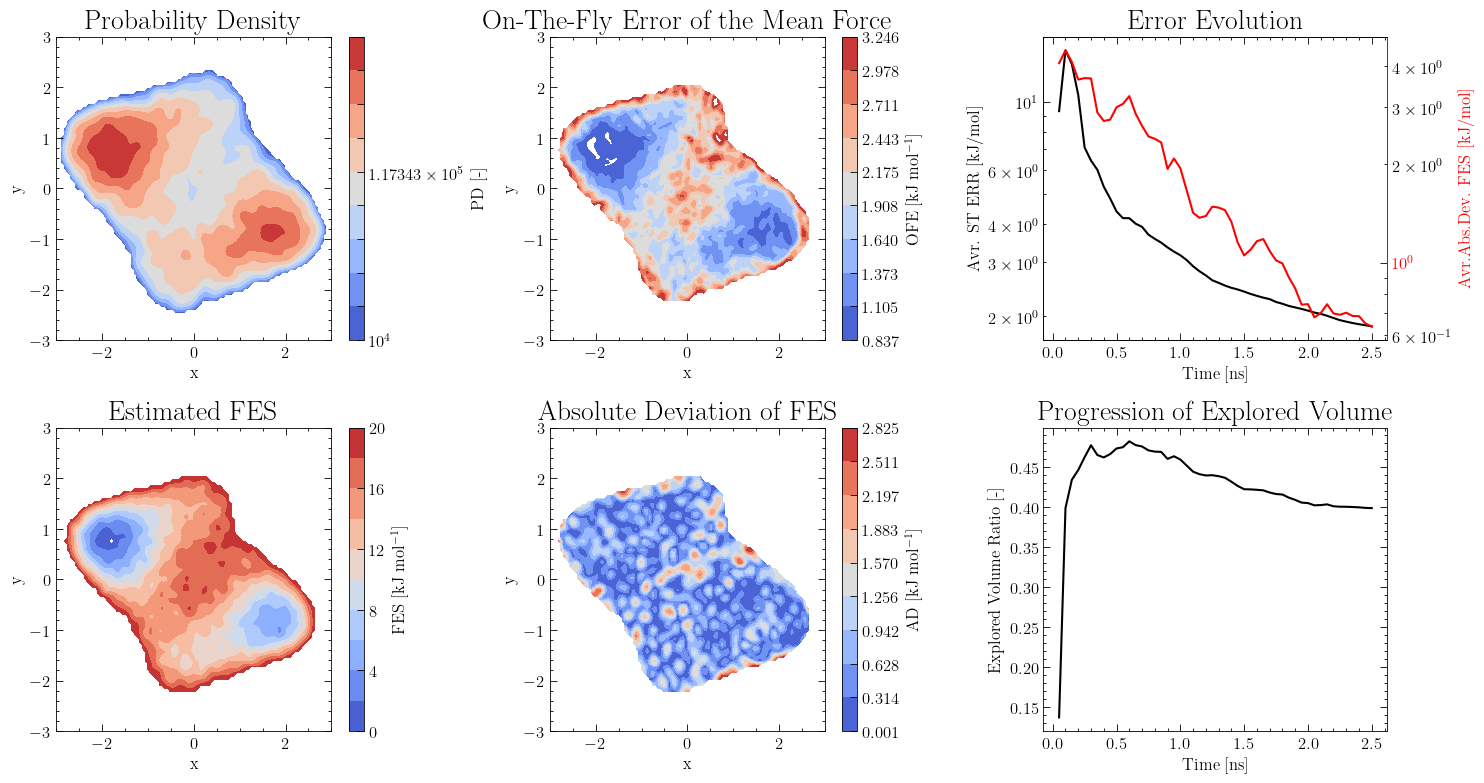

In [96]:
MFI.plot_results()
# MFI.plot_results(error_map_gaussian_filter=3, max_ofe=2.5, min_ofe=0, max_AD=0.9, min_AD=0)


### 2nd simulation

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running simulation with System = Langevin2D: n_steps=500,000, ipos=1.47,1.164, Pos_t=20, T=1, t_Tot=2.50ns
sigma=[0.05,0.05], h=0.5, bf=3, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 2.5ns | Total time: 7 sec | Finished at 21:19:25                                                         

Langevin2D simulation finished in 7 sec.


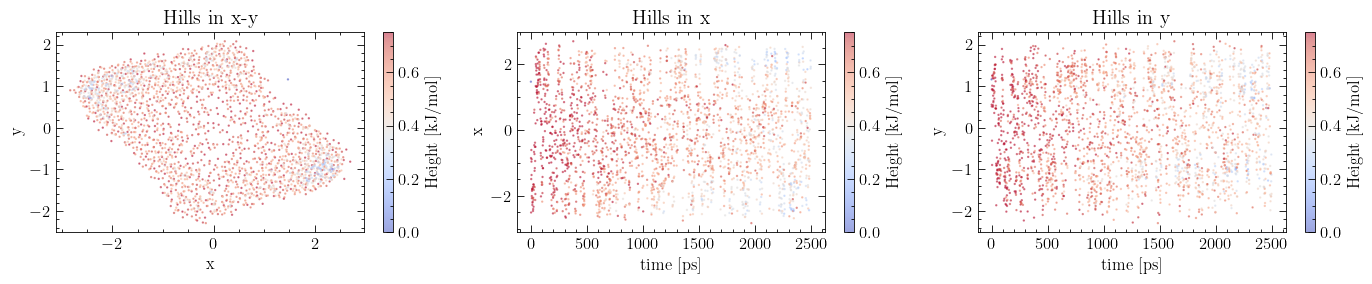

| 100% | AAD: 0.424 [kJ/mol] | Total time: 3 sec                                                            


In [24]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "metad_height":0.5, "biasfactor":3, "metad_width":[0.05, 0.05]})
new_params.update({"Bias_sf":1.05, "gaus_filter_sigma":3})
new_params.update({"ID":"_inve2", "base_forces":MFI.force_terms, "base_time": MFI.sim_time})

MFI2 = MFI_class2D.MFI2D(**new_params)

MFI2.make_external_bias(FES=MFI.FES, bias_type="")

MFI2.run_simulation()
os.system("rm bck.* stats.out")

MFI2.load_data(); lib2.plot_hills_trajectory(MFI2.hills)

MFI2.analyse_data()
t2, v2, aofe2, aad2 = MFI2.Avr_Error_list[:,0], MFI2.Avr_Error_list[:,1], MFI2.Avr_Error_list[:,2], MFI2.Avr_Error_list[:, MFI2.Avr_Error_info.index("AAD")]


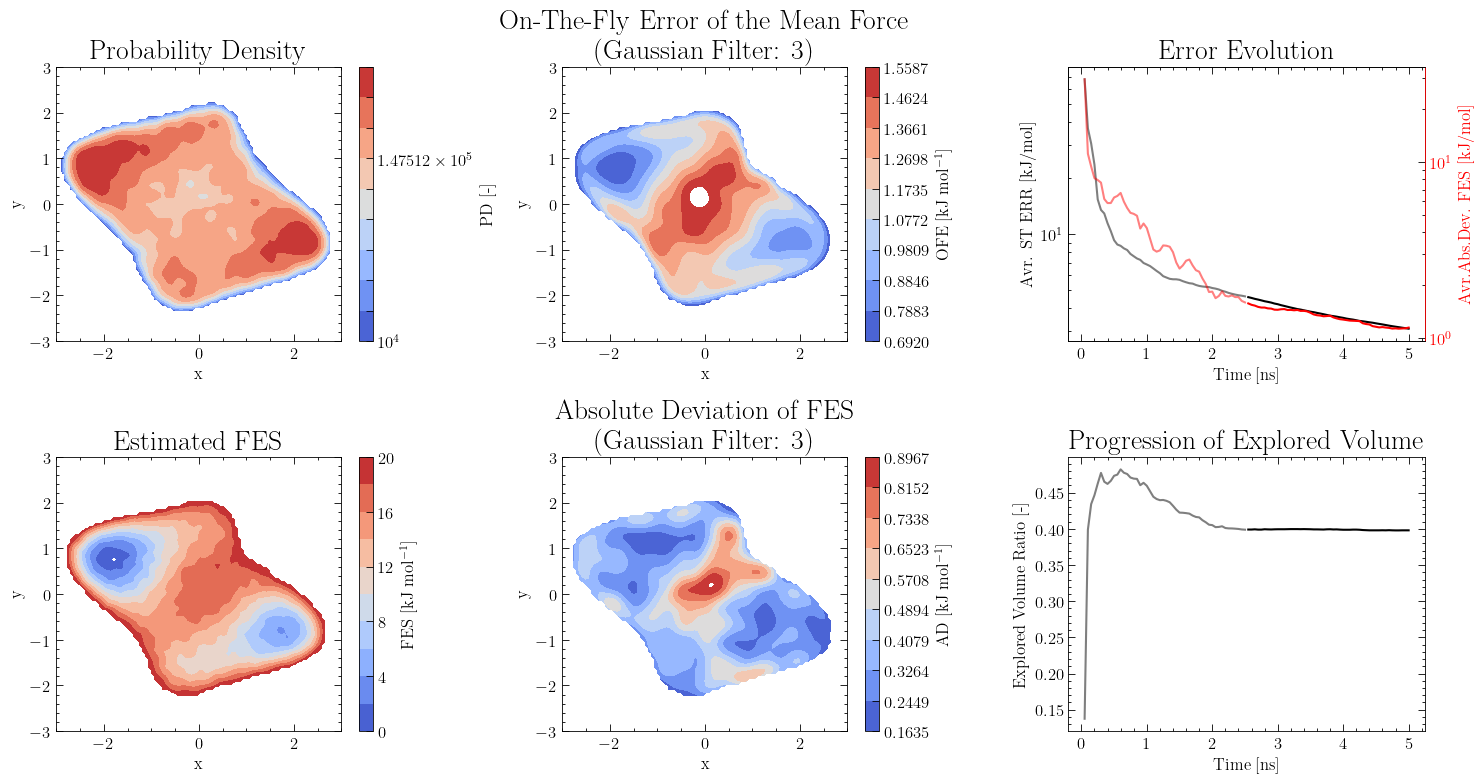

In [14]:

MFI2.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1], more_vol=[t1, v1], error_map_gaussian_filter=3)#, max_ofe=2.5, min_ofe=0, max_AD=0.9, min_AD=0)


### 3rd Simulation

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running simulation with System = Langevin2D: n_steps=500,000, ipos=1.764,-2.394, Pos_t=20, T=1, t_Tot=2.50ns
sigma=[0.05,0.05], h=0.1, bf=3, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 2.5ns | Total time: 7 sec | Finished at 21:19:36                                                         

Langevin2D simulation finished in 7 sec.


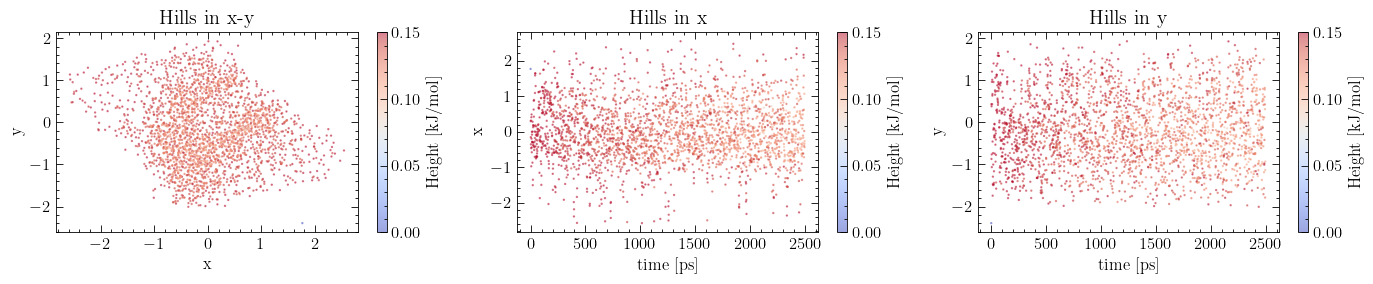

| 100% | AAD: 0.385 [kJ/mol] | Total time: 3 sec                                                            


In [25]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "metad_height":0.1, "biasfactor":3, "metad_width":[0.05, 0.05]})
new_params.update({"Bias_sf":1, "gaus_filter_sigma":1})
new_params.update({"ID":"_inve3", "base_forces":lib2.patch_forces([MFI.force_terms, MFI2.force_terms]), "base_time": MFI.sim_time + MFI2.sim_time})

MFI3 = MFI_class2D.MFI2D(**new_params)

MFI3.make_external_bias(FES=MFI2.FES, error=MFI2.ofe, bias_type="error")

MFI3.run_simulation()
os.system("rm bck.* stats.out")

MFI3.load_data(); lib2.plot_hills_trajectory(MFI3.hills)

MFI3.analyse_data()
t3, v3, aofe3, aad3 = MFI3.Avr_Error_list[:,0], MFI3.Avr_Error_list[:,1], MFI3.Avr_Error_list[:,2], MFI3.Avr_Error_list[:, MFI3.Avr_Error_info.index("AAD")]


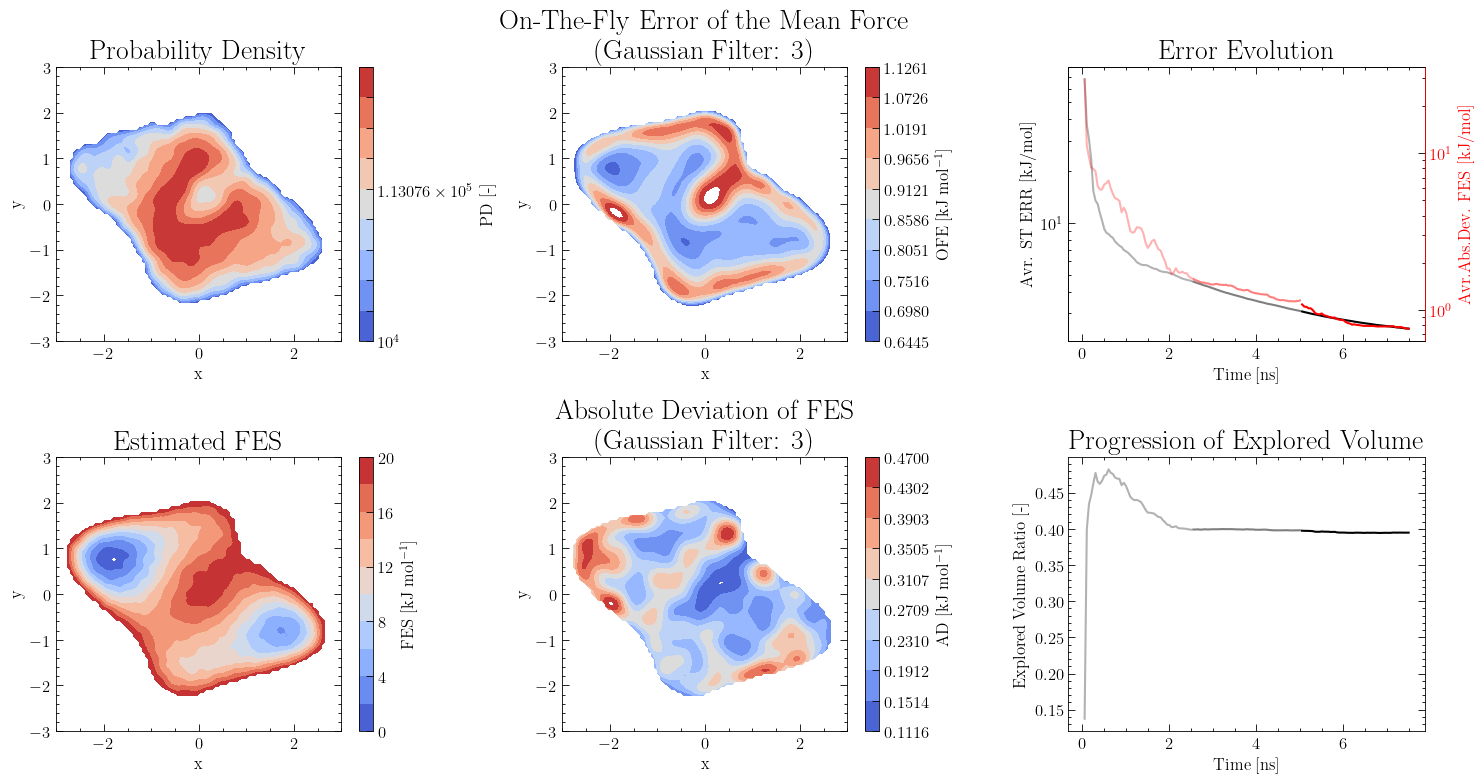

In [16]:
MFI3.plot_results(more_aofe=[[t1, aofe1],[t2,aofe2]] , more_aad = [[t1, aad1], [t2, aad2]], more_vol=[[t1, v1], [t2, v2]], error_map_gaussian_filter=3)#, max_ofe=2.5, min_ofe=0, max_AD=0.9, min_AD=0)


### 4th Simulation

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running simulation with System = Langevin2D: n_steps=500,000, ipos=1.482,2.604, Pos_t=20, T=1, t_Tot=2.50ns
Harmonic potential: centre=0.5,0.5, kappa=0.5,0.5
Static bias used: external_bias.dat 

| 100% | Simulated time: 2.5ns | Total time: 6 sec | Finished at 21:19:46                                                         

Langevin2D simulation finished in 6 sec.


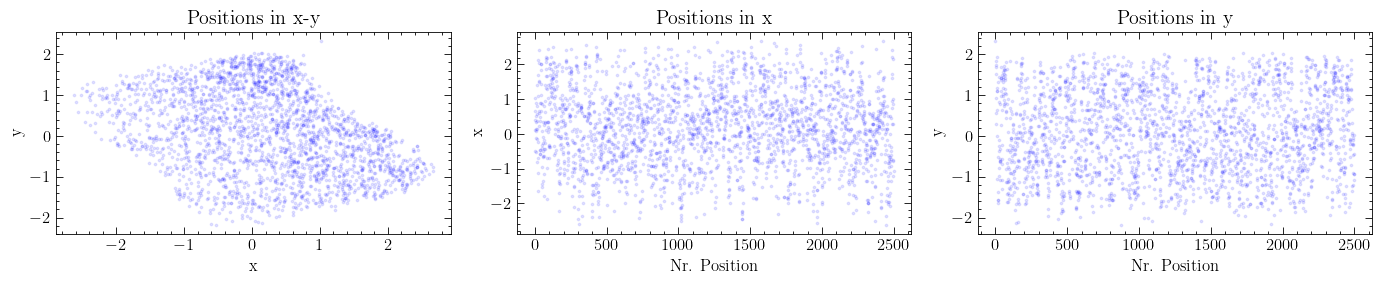

| 100% | AAD: 0.383 [kJ/mol] | Total time: 3 sec                                                            


In [26]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "metad_height":None})
new_params.update({"Bias_sf":1, "gaus_filter_sigma":1})
new_params.update({"hp_centre_x":0.5, "hp_kappa_x":0.5, "hp_centre_y":0.5, "hp_kappa_y":0.5})
new_params.update({"ID":"_inve4", "base_forces":lib2.patch_forces([MFI.force_terms, MFI2.force_terms, MFI3.force_terms]), "base_time": MFI.sim_time + MFI2.sim_time + MFI3.sim_time})

MFI4 = MFI_class2D.MFI2D(**new_params)

MFI4.make_external_bias(FES=MFI3.FES, bias_type="")

MFI4.run_simulation()
os.system("rm bck.* stats.out")

MFI4.load_data(); lib2.plot_position_trajectory(MFI4.position)

MFI4.analyse_data()
t4, v4, aofe4, aad4 = MFI4.Avr_Error_list[:,0], MFI4.Avr_Error_list[:,1], MFI4.Avr_Error_list[:,2], MFI4.Avr_Error_list[:, MFI4.Avr_Error_info.index("AAD")]


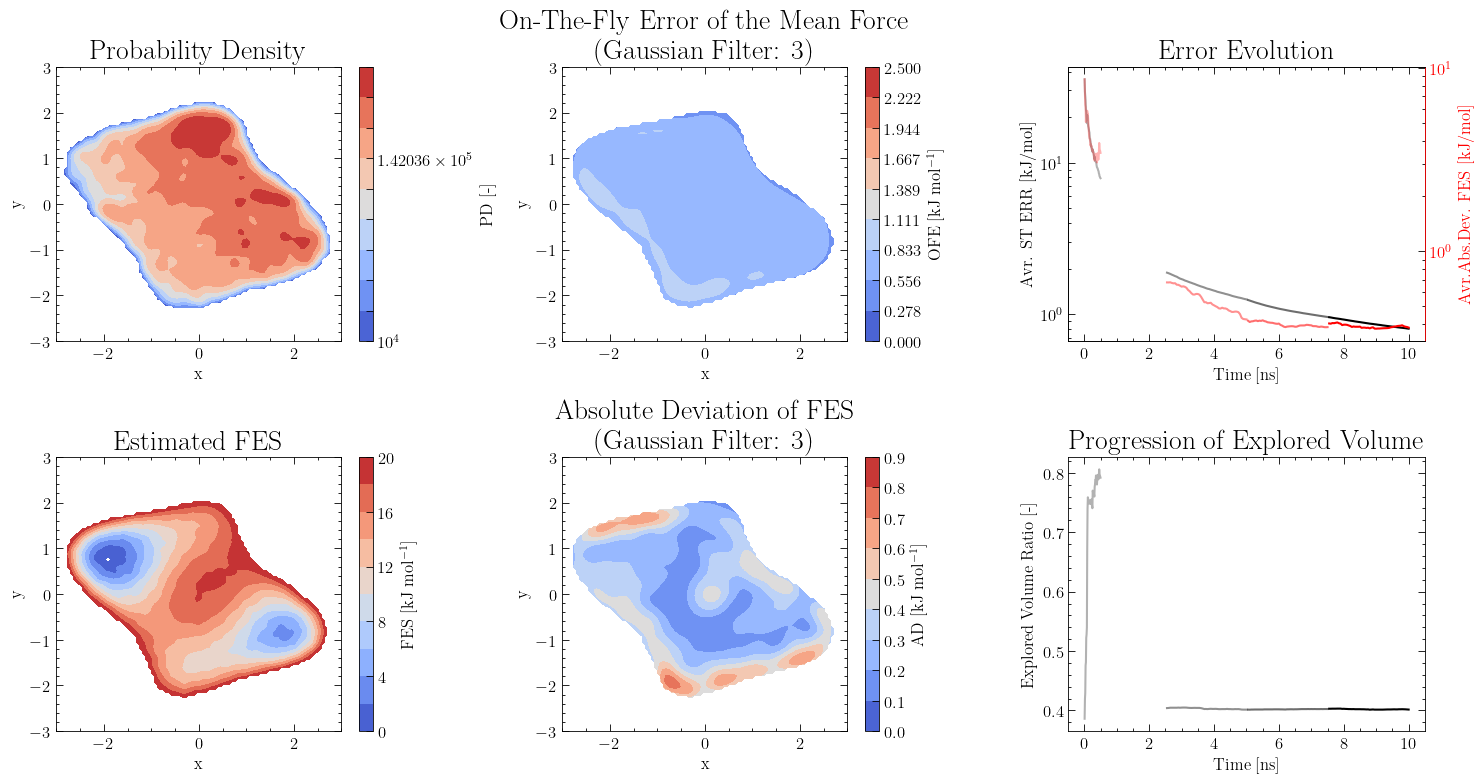

In [37]:
MFI4.plot_results(more_aofe=[[t1, aofe1],[t2,aofe2],[t3,aofe3]] , more_aad = [[t1, aad1], [t2, aad2],[t3, aad3]], more_vol=[[t1, v1], [t2, v2], [t3, v3]], error_map_gaussian_filter=3, max_ofe=2.5, min_ofe=0, max_AD=0.9, min_AD=0)


### 5th Simulation (length of all previous simulations combined)

Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running simulation with System = Langevin2D: n_steps=2,000,000, ipos=-0.702,-1.626, Pos_t=20, T=1, t_Tot=10.00ns
sigma=[0.05,0.05], h=0.1, bf=3, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 10.0ns | Total time: 25 sec | Finished at 21:20:15                                                         

Langevin2D simulation finished in 25 sec.


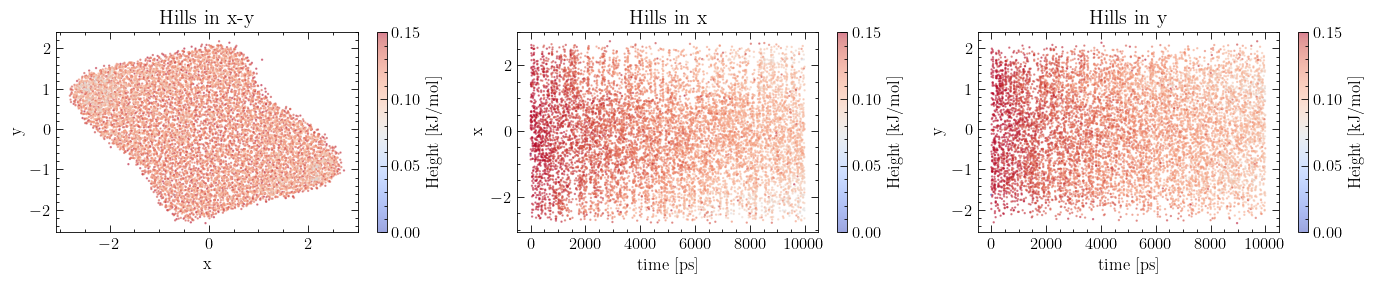

| 100% | AAD: 0.291 [kJ/mol] | Total time: 10 sec                                                            


In [27]:
new_params = {**default_params}
new_params.update({"simulation_steps":2_000_000, "metad_height":0.1, "biasfactor":3, "metad_width":[0.05, 0.05]})
new_params.update({"Bias_sf":1, "gaus_filter_sigma":1})
new_params.update({"ID":"_inve5", "base_forces":lib2.patch_forces([MFI.force_terms, MFI2.force_terms, MFI3.force_terms, MFI4.force_terms]), "base_time": MFI.sim_time + MFI2.sim_time + MFI3.sim_time + MFI4.sim_time})

MFI5 = MFI_class2D.MFI2D(**new_params)

MFI5.make_external_bias(FES=MFI4.FES, bias_type="")

MFI5.run_simulation()
os.system("rm bck.* stats.out")

MFI5.load_data(); lib2.plot_hills_trajectory(MFI5.hills)

MFI5.analyse_data()


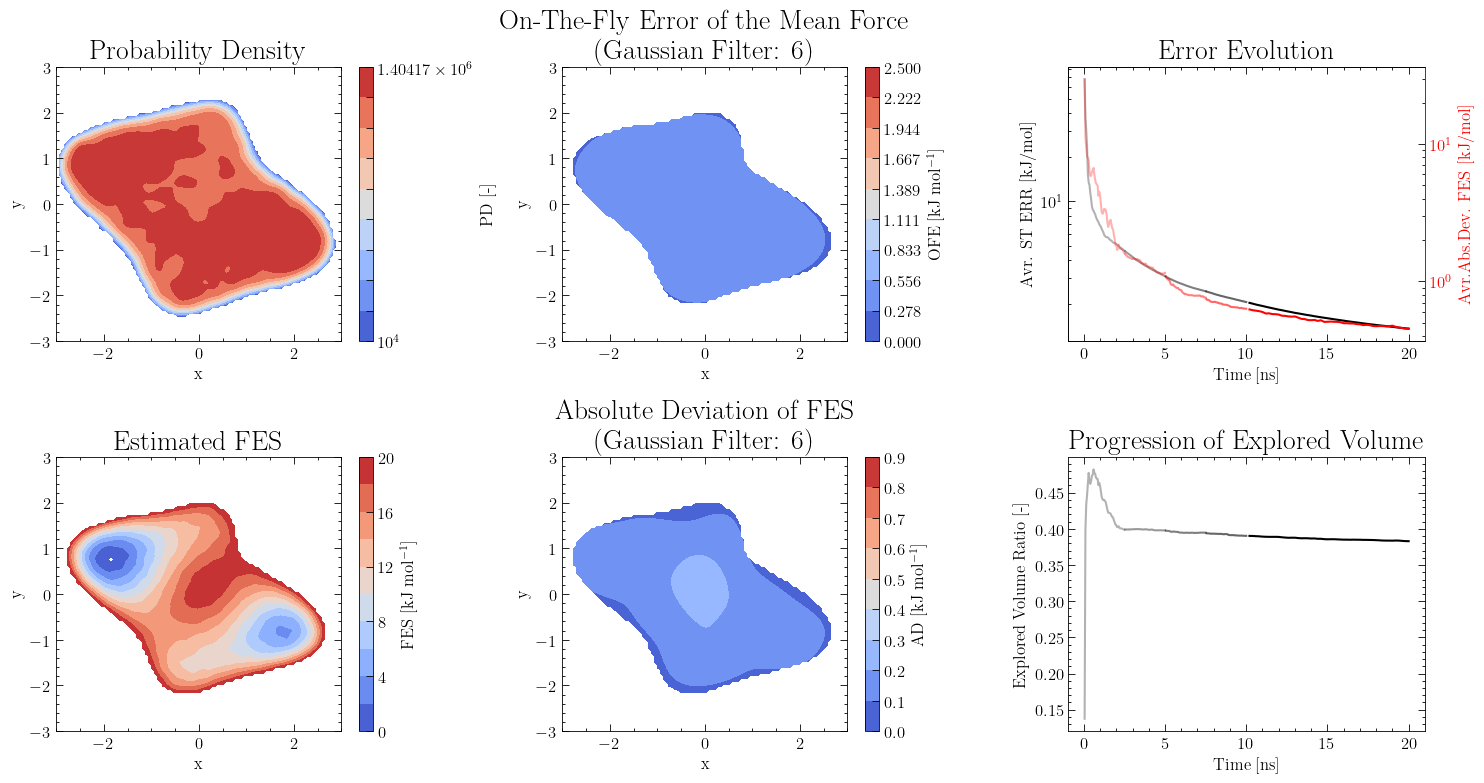

In [20]:
MFI5.plot_results(more_aofe=[[t1, aofe1],[t2,aofe2],[t3,aofe3],[t4,aofe4]] , more_aad = [[t1, aad1], [t2, aad2],[t3, aad3],[t4, aad4]], more_vol=[[t1, v1], [t2, v2], [t3, v3], [t4, v4]], 
                  error_map_gaussian_filter=6, max_ofe=2.5, min_ofe=0, max_AD=0.9, min_AD=0)


### Test US simulation (with simulation 1 as base)

In [84]:
reload(MFI_class2D); reload(lib2); pass

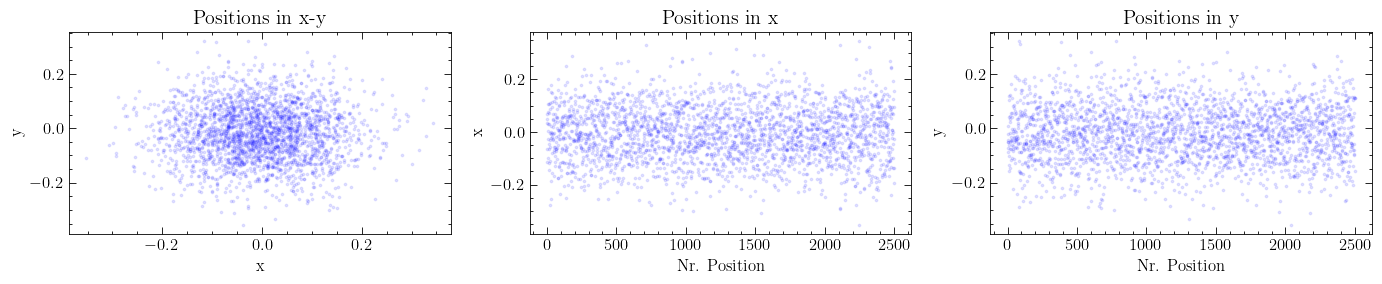

| 100% | AAD: 0.724 [kJ/mol] | Total time: 2 sec                                                            


In [28]:
new_params = {**default_params}
new_params.update({"simulation_steps":500_000, "metad_height":None})#, "n_pos_per_hill":-1})
new_params.update({"initial_position":[0,0]})
new_params.update({"Bias_sf":1, "gaus_filter_sigma":3})
new_params.update({"ID":"_inve_HP", "base_forces":MFI.force_terms, "base_time": MFI.sim_time})
new_params.update({"hp_centre_x":0, "hp_kappa_x":100, "hp_centre_y":0, "hp_kappa_y":100})

MFI_HP = MFI_class2D.MFI2D(**new_params)

MFI_HP.make_external_bias(FES=MFI.FES, bias_type="")

# MFI_HP.run_simulation()
# os.system("rm bck.* stats.out")

MFI_HP.load_position(); lib2.plot_position_trajectory(MFI_HP.position)

MFI_HP.analyse_data()


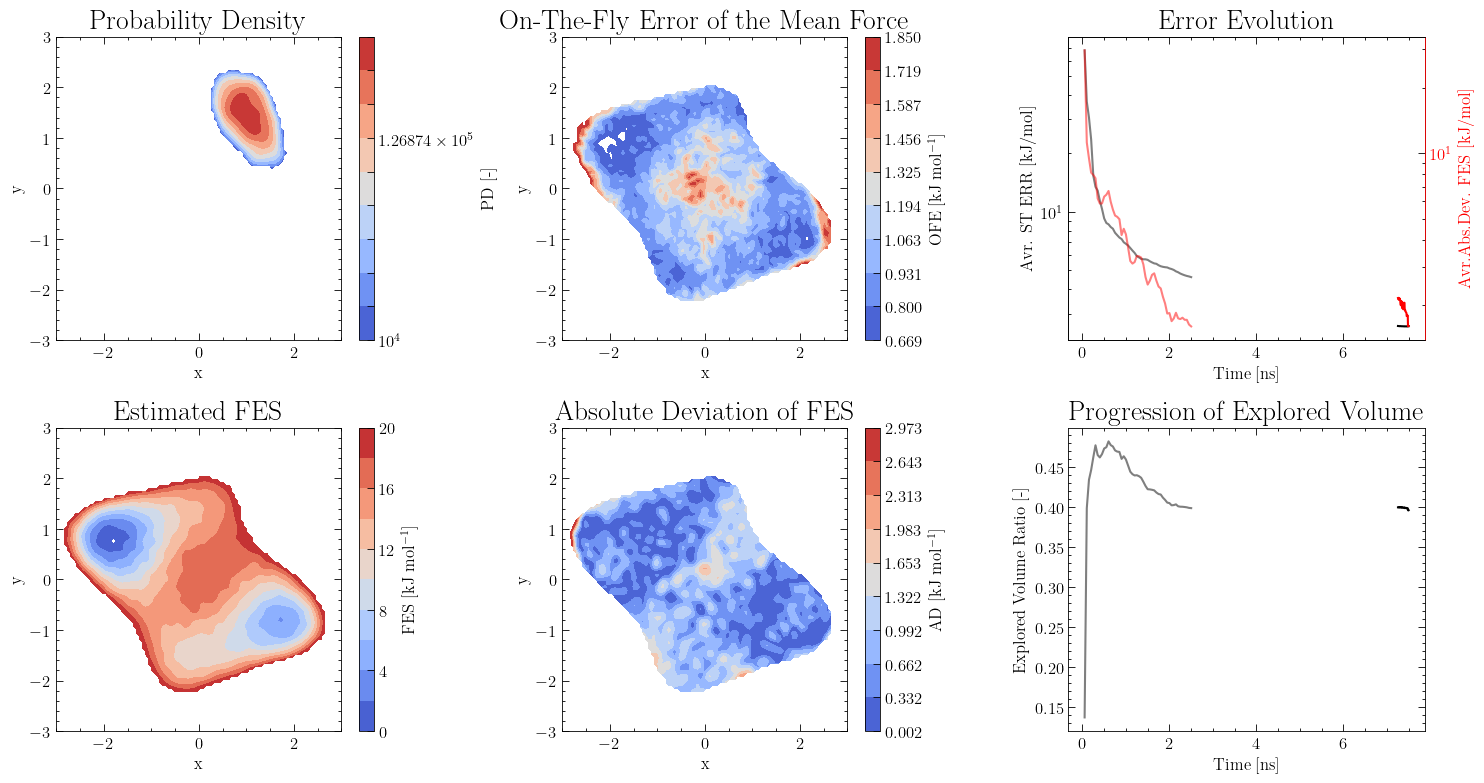

In [31]:
MFI_HP.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1], more_vol=[t1, v1])#, error_map_gaussian_filter=3)


### Test simulation bias valley along transition path (with simulation 1 as base)

In [92]:
reload(MFI_class2D); reload(lib2); pass

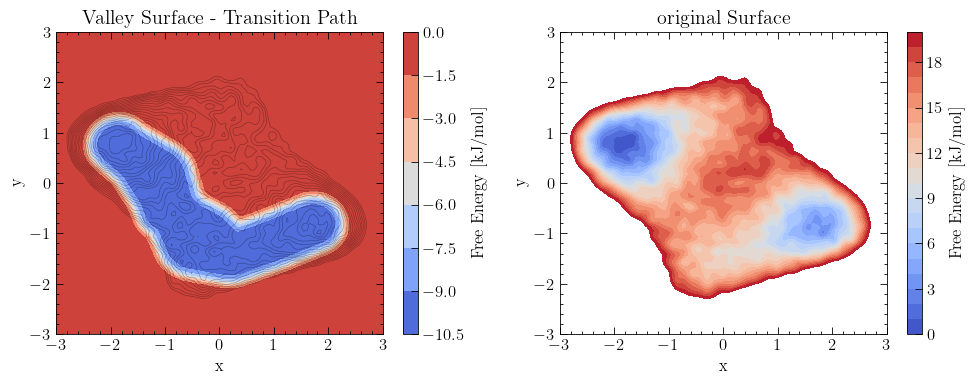

In [29]:
### test the valley surface
Z = lib2.create_valley_surface(X, Y, FES=MFI.FES)#, valley_depth=10, valley_width=3/5, sharpness_exponent=6, n_images=15, n_points_interp=None, force_convergence_goal=0.2, max_steps=1000, step_size=0.03, print_info=True)

plt.figure(figsize=(10,4));plt.subplot(1,2,1);  
plt.contourf(X, Y, Z, cmap="coolwarm"); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Valley Surface - Transition Path"); 
plt.contour(X,Y, MFI.FES, levels=np.linspace(0, 20, 21), colors='black', linewidths=0.5, alpha=0.3)
plt.subplot(1,2,2);  
plt.contourf(X, Y, MFI.FES, levels=np.linspace(0, 20, 21), cmap="coolwarm"); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("original Surface"); 
plt.tight_layout(); plt.show()


Simulation started with Terminal input: plumed pesmd < input >/dev/null 2>&1

Running simulation with System = Langevin2D: n_steps=2,000,000, ipos=2,-1, Pos_t=20, T=1, t_Tot=10.00ns
sigma=[0.1,0.1], h=0.5, bf=5, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 10.0ns | Total time: 25 sec | Finished at 21:20:57                                                         

Langevin2D simulation finished in 25 sec.


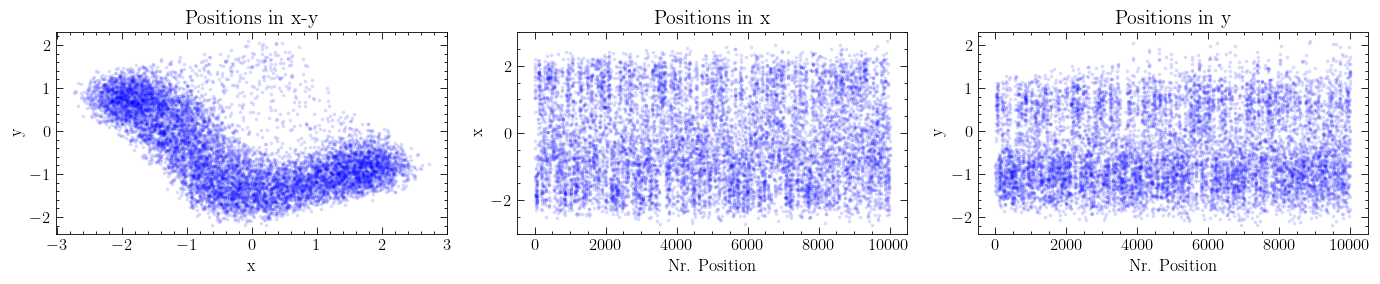

| 100% | AAD: 0.72 [kJ/mol] | Total time: 10 sec                                                            


In [30]:
new_params = {**default_params}
new_params.update({"simulation_steps":2_000_000, "metad_height":0.5, "biasfactor":5, "metad_width":[0.1, 0.1]})#, "n_pos_per_hill":-1})
new_params.update({"initial_position":[2, -1]})
new_params.update({"Bias_sf":1, "gaus_filter_sigma":3})
new_params.update({"ID":"_inve_trans_path_bias", "base_forces":MFI.force_terms, "base_time": MFI.sim_time})

MFI_TPB = MFI_class2D.MFI2D(**new_params)

MFI_TPB.make_external_bias(FES=MFI.FES, bias_type="transition_path")

MFI_TPB.run_simulation()
os.system("rm bck.* stats.out")

MFI_TPB.load_position(); lib2.plot_position_trajectory(MFI_TPB.position)

MFI_TPB.analyse_data()


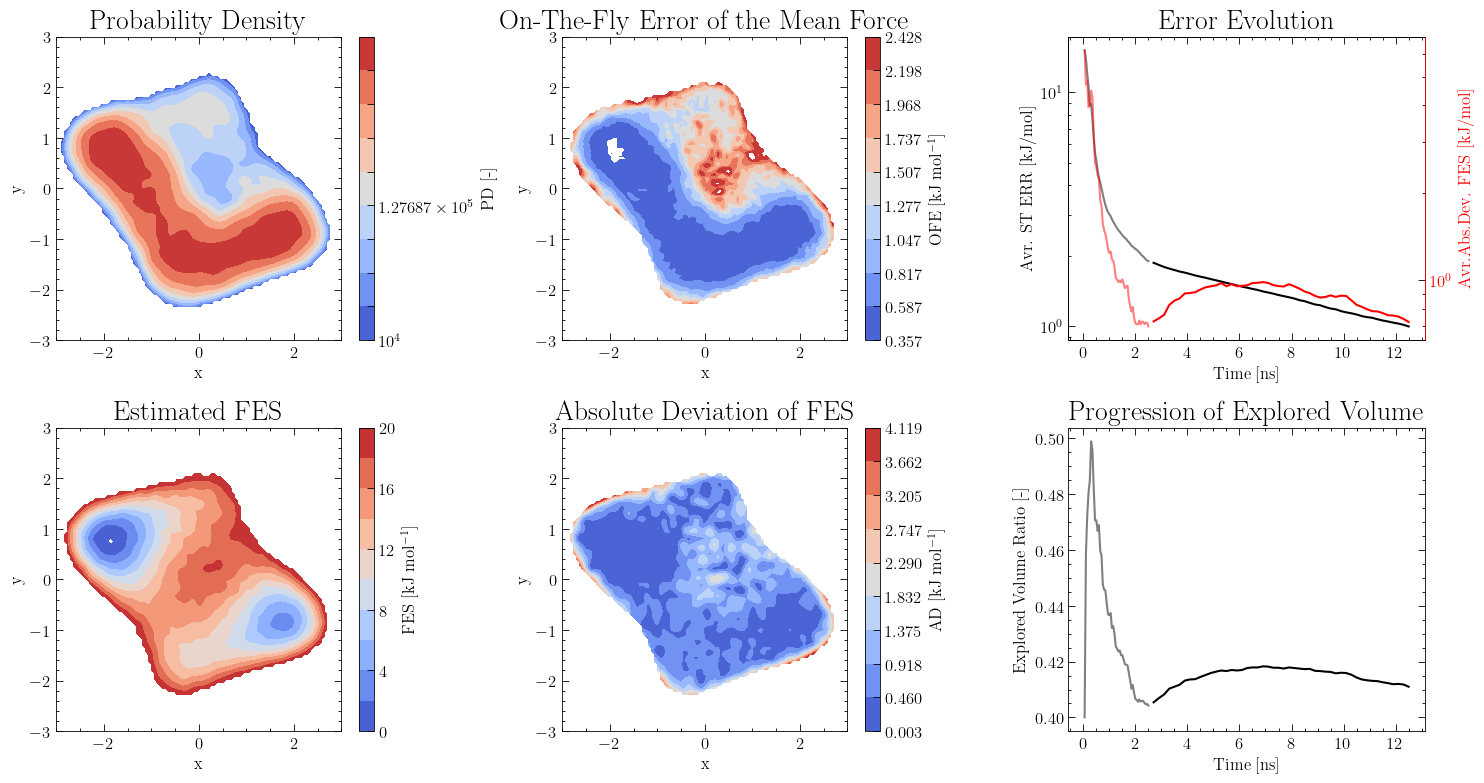

In [31]:
MFI_TPB.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1], more_vol=[t1, v1])#, min_AD=0, max_AD=1, min_ofe=0, max_ofe=1)#, error_map_gaussian_filter=3)


### run multiple short umbrella simulations


ix=-2.0 : AAD = 0.69510
ix=-2.000, iy=-2.000 | ix=-2.000, iy=-0.667 | ix=-2.000, iy=0.667 | ix=-2.000, iy=2.000 | 
ix=-1.0 : AAD = 1.65457
ix=-1.000, iy=-2.000 | ix=-1.000, iy=-0.667 | ix=-1.000, iy=0.667 | ix=-1.000, iy=2.000 | 
ix=0.0 : AAD = 1.75631
ix=0.000, iy=-2.000 | ix=0.000, iy=-0.667 | ix=0.000, iy=0.667 | ix=0.000, iy=2.000 | 
ix=1.0 : AAD = 1.43365
ix=1.000, iy=-2.000 | ix=1.000, iy=-0.667 | ix=1.000, iy=0.667 | ix=1.000, iy=2.000 | 
ix=2.0 : AAD = 1.10664
ix=2.000, iy=-2.000 | ix=2.000, iy=-0.667 | ix=2.000, iy=0.667 | ix=2.000, iy=2.000 | 

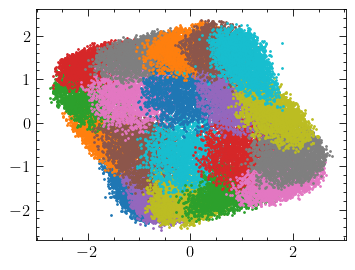

In [32]:
new_params = {**default_params}
new_params.update({"simulation_steps":50_000, "metad_height":1})#, "n_pos_per_hill":-1})
new_params.update({"ID":"_inve_HP_sort", "Bias_sf":1, "gaus_filter_sigma":3})
new_params.update({"print_info":False})

force_terms = MFI.force_terms
base_time = MFI.sim_time
t_list = list(MFI.Avr_Error_list[:,0])
aofe_list = list(MFI.Avr_Error_list[:,2])
aad_list = list(MFI.Avr_Error_list[:, MFI.Avr_Error_info.index("AAD")])

for ix in np.linspace(-2, 2, 5):
    print(f"\n{ix=} : AAD = {aad_list[-1]:.5f}")
    for iy in np.linspace(-2, 2, 4):
        print(f"{ix=:.3f}, {iy=:.3f}", end=" | ")
        new_params.update({"initial_position":[ix,iy], "hp_centre_x":ix, "hp_kappa_x":20, "hp_centre_y":iy, "hp_kappa_y":20})
        new_params.update({"base_forces":force_terms, "base_time": base_time})
  
        MFI_HP = MFI_class2D.MFI2D(**new_params)

        MFI_HP.make_external_bias(FES=MFI.FES, bias_type="")

        MFI_HP.run_simulation()
        os.system("rm bck.* stats.out")

        MFI_HP.analyse_data(print_analysis=False)
        
        force_terms = lib2.patch_forces([force_terms, MFI_HP.force_terms])
        base_time += MFI_HP.sim_time
        t_list += list(MFI_HP.Avr_Error_list[:,0])
        aofe_list += list(MFI_HP.Avr_Error_list[:,2])
        aad_list += list(MFI_HP.Avr_Error_list[:, MFI_HP.Avr_Error_info.index("AAD")])
        
        plt.scatter(MFI_HP.position[:,1], MFI_HP.position[:,2], s=1)
        
        


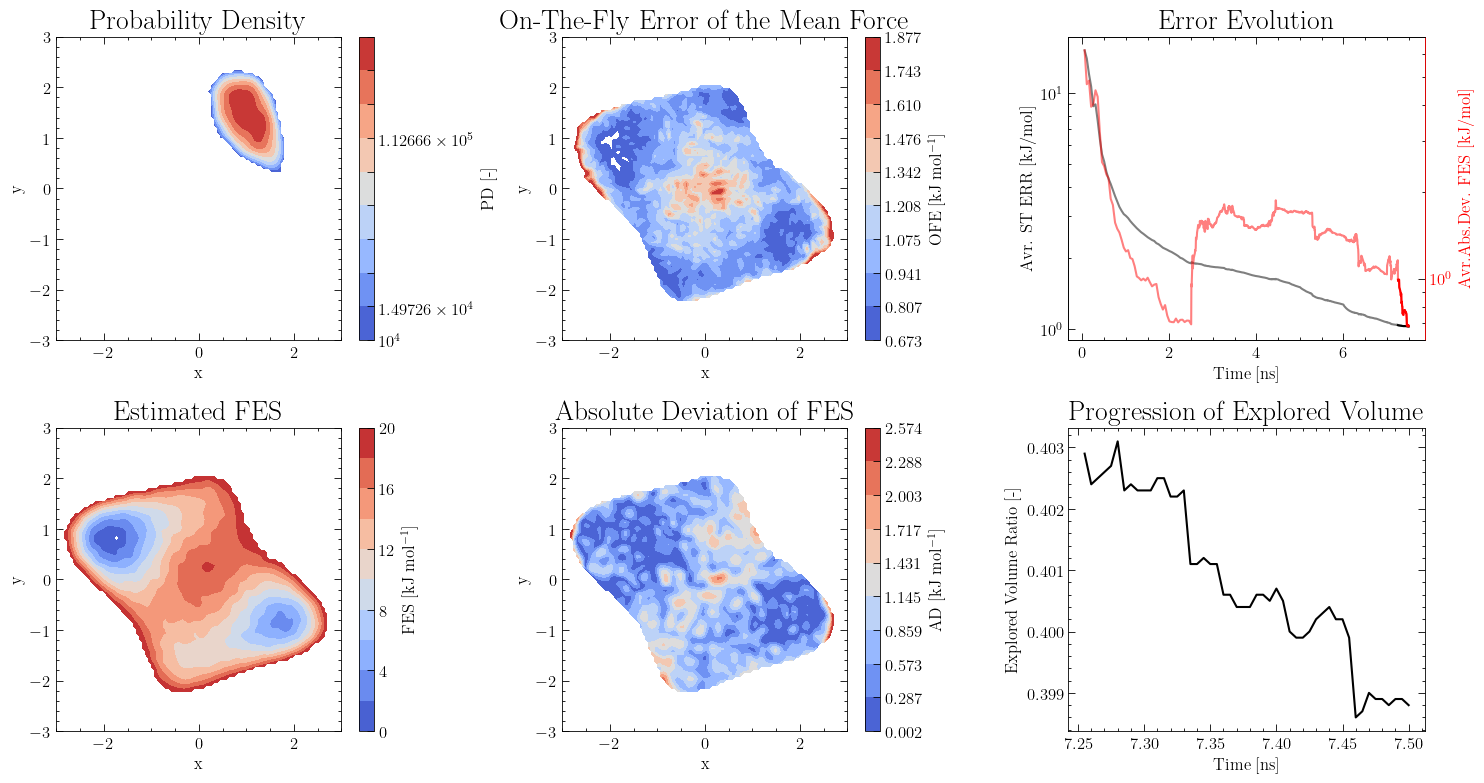

In [33]:
MFI_HP.plot_results(more_aofe=[t_list, aofe_list] , more_aad = [t_list, aad_list])#, error_map_gaussian_filter=3)


### Restart

In [29]:
# new_params = {**default_params}
# new_params.update({"simulation_steps":500_000, "ID":"_inve", "metad_height":0.5, "biasfactor":3, "metad_width":[0.05, 0.05]})
# new_params.update({"Bias_sf":1.1, "gaus_filter_sigma":3})

# MFI_Restart = MFI_class2D.MFI2D(**new_params)

# # MFI.run_simulation()
# # os.system("rm bck.* stats.out")

# MFI_Restart.make_external_bias(FES=MFI.FES, bias_type="")

# MFI_Restart.load_data(); lib2.plot_hills_trajectory(MFI_Restart.hills)

# MFI_Restart.analyse_data()
# t1, v1, aofe1, aad1 = MFI.Avr_Error_list[:,0], MFI.Avr_Error_list[:,1], MFI.Avr_Error_list[:,2], MFI.Avr_Error_list[:, MFI.Avr_Error_info.index("AAD")]


# new_params = {**default_params}
# new_params.update({"ID":"_inve2", "base_forces":MFI.force_terms, "base_time": MFI.sim_time})









## ## Alanine Dipeptide

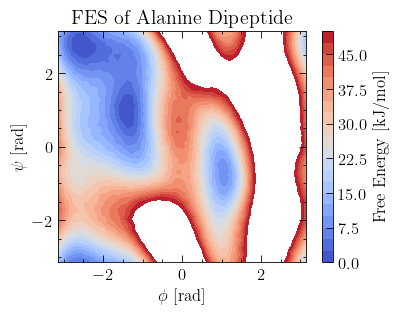

In [39]:
grid = np.linspace(-np.pi, np.pi, 101); 
X, Y = np.meshgrid(grid, grid)
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, periodic=[True, True])

path_AP = path_data + "Alanine_Dipeptide/"
path_input = path_notebook + "/gmx_files/Alanine_Dipeptide/"
plumed_dat_text = f"MOLINFO STRUCTURE={path_input}reference.pdb\nphi: TORSION ATOMS=@phi-2\npsi: TORSION ATOMS=@psi-2\n"

_, _, AP_ref = lib2.load_pkl(path_input + "AP_ref_101x101.pkl")
plt.contourf(X, Y, AP_ref, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("$\phi$ [rad]"); plt.ylabel("$\psi$ [rad]"); plt.title("FES of Alanine Dipeptide"); plt.show()

t_compare, v_compare, aofe_compare, aad_compare = lib2.load_pkl(path_input+"AP_10ns_t_v_aofe_aad_prog.pkl")


In [40]:
# default parameters for the MFI class
default_params = {	"X":X, "Y":Y, "Z":AP_ref, "plX":plX, "plY":plY, "periodic":[True, True], "System":"gromacs", "cv_name":["phi","psi"], "plumed_dat_text":plumed_dat_text,
                    "kT":2.49, "time_step":0.001, "simulation_steps":500_000, "position_pace":20, "n_pos_per_window":10, 
					"metad_pace":200, "metad_width":[0.1, 0.1], "metad_height":10, "biasfactor":10, "bw":[0.1, 0.1],
         			"len_error_list":50, "FES_cutoff":50.0, # "record_maps":True, "record_forces_e":True, "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    # "save_error_progression":True, "save_force_terms":True, "save_results":True, "save_mfi_instance":True, 
                    "simulation_folder_path": path_AP, "ID":"",
				  	
                    "find_sim_init_structure":True, "make_tpr_input_file":True, 
					"trajectory_xtc_file_path_list":[path_input+"traj_0.xtc"], "structure_gro_file_path":path_input+"structure.gro", "mdp_file_path":path_input+"gromppvac.mdp", "top_file_path":path_input+"topology.top", "tpr_file_path":path_input+"input.tpr", "pdb_file_path":path_input+"reference.pdb",
           			}
                  

In [44]:
os.chdir(path_notebook); reload(MFI_class2D); reload(lib2); pass

### 1st Simulation

Simulation started with Terminal input: gmx mdrun -s input_new.tpr -nsteps 500000 -plumed plumed.dat >/dev/null 2>&1

Running simulation with System = gromacs: n_steps=500,000, ipos=0.509,2.375, Pos_t=20, T=2.49, t_Tot=0.50ns
sigma=[0.1,0.1], h=10, bf=10, Gaus_t=200 

| 100% | Simulated time: 0.5ns | Total time: 1.0 min : 40 sec | Finished at 22:41:47                                                         

gromacs simulation finished in 1.0 min : 40 sec.
| 100% | AAD: 3.613 [kJ/mol] | Total time: 6 sec                                                            


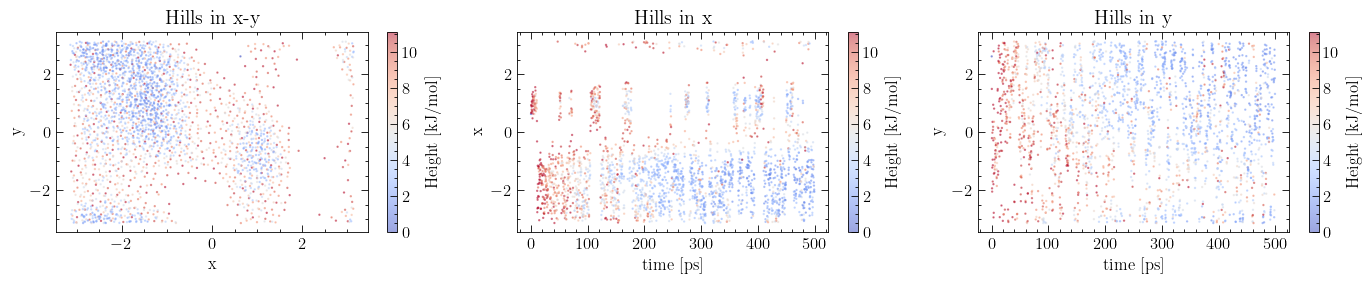

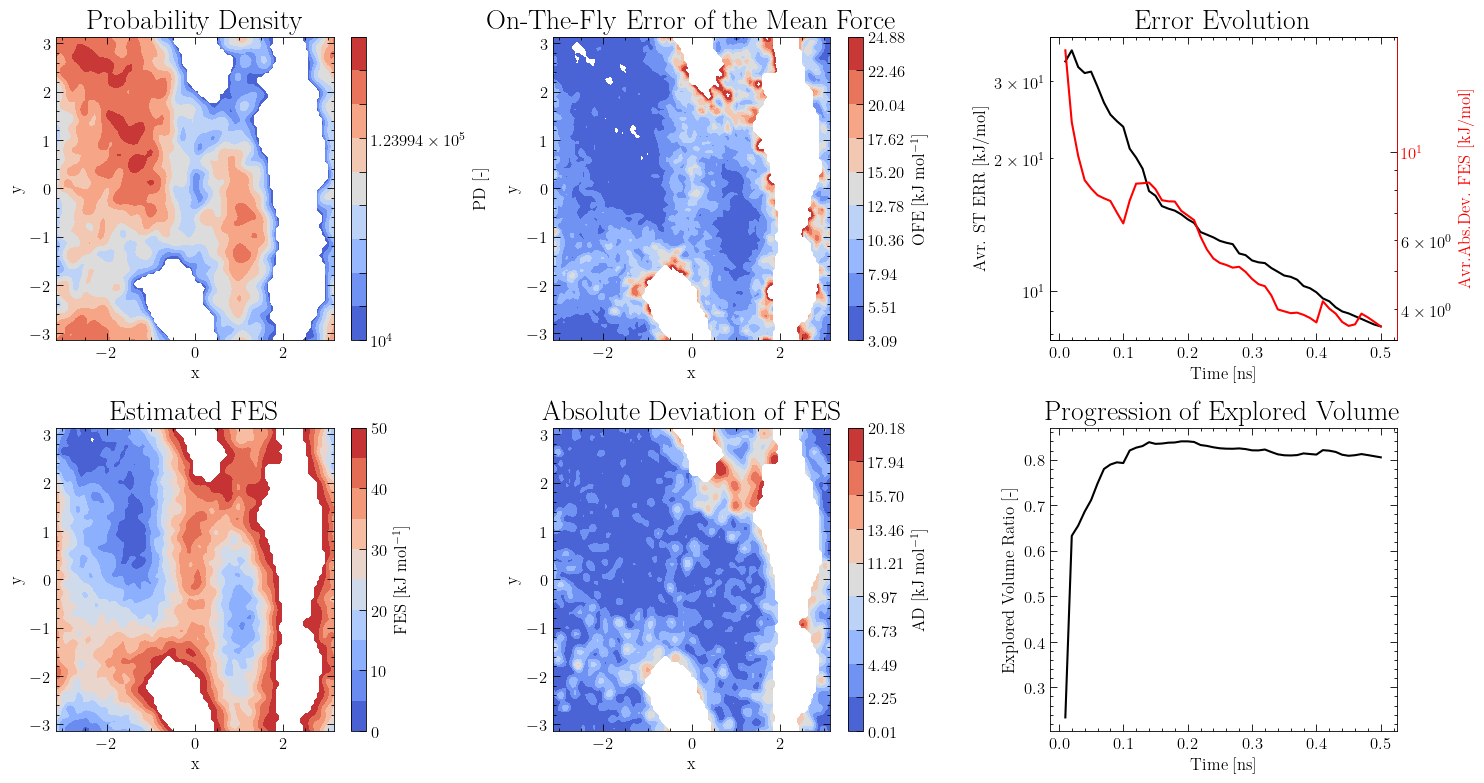

In [45]:
new_params = {**default_params}
new_params.update({"ID":"_1", "simulation_folder_path": path_AP})

MFI = MFI_class2D.MFI2D(**new_params)

# if os.path.isfile(MFI.hills_file) and (lib2.count_lines(MFI.hills_file) > (MFI.simulation_steps / MFI.metad_pace)*0.9): print("HILLS file already complete. Skipping simulation.")
# else: MFI.run_simulation(); 
# # os.system("rm bck.* stats.out")
MFI.run_simulation()

MFI.analyse_data()

lib2.plot_hills_trajectory(MFI.hills)

MFI.plot_results()
t1, v1, aofe1, aad1 = MFI.Avr_Error_list[:,0], MFI.Avr_Error_list[:,1], MFI.Avr_Error_list[:,2], MFI.Avr_Error_list[:, MFI.Avr_Error_info.index("AAD")]


### 2nd Simulation

Make TPR file command:  gmx grompp -f /home/ucecabj/Desktop/MFI_git/MFI_class2D/gmx_files/Alanine_Dipeptide/gromppvac.mdp -c structure_new.gro -p /home/ucecabj/Desktop/MFI_git/MFI_class2D/gmx_files/Alanine_Dipeptide/topology.top -o input_new.tpr
Simulation started with Terminal input: gmx mdrun -s input_new.tpr -nsteps 500000 -plumed plumed.dat >/dev/null 2>&1

Running Alanine Dipeptide simulation: n_steps=500,000, ipos=-0.446,-2.821, Pos_t=20, T=2.49, t_Tot=0.50ns
sigma=[0.1,0.1], h=3, bf=10, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 0.5ns | Total time: 1.0 min : 54 sec | Finished at 10:17:33                                                         

Alanine Dipeptide simulation finished in 1.0 min : 54 sec.
| 100% | AAD: 2.367 [kJ/mol] | Total time: 7 sec                                                            


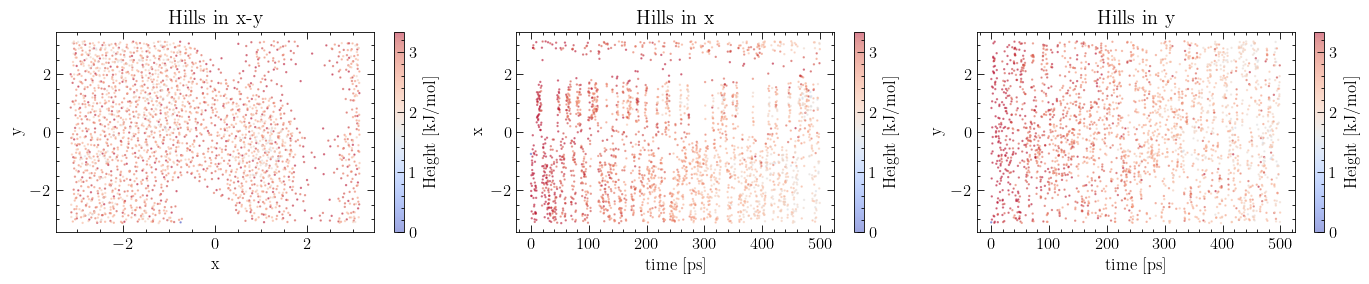

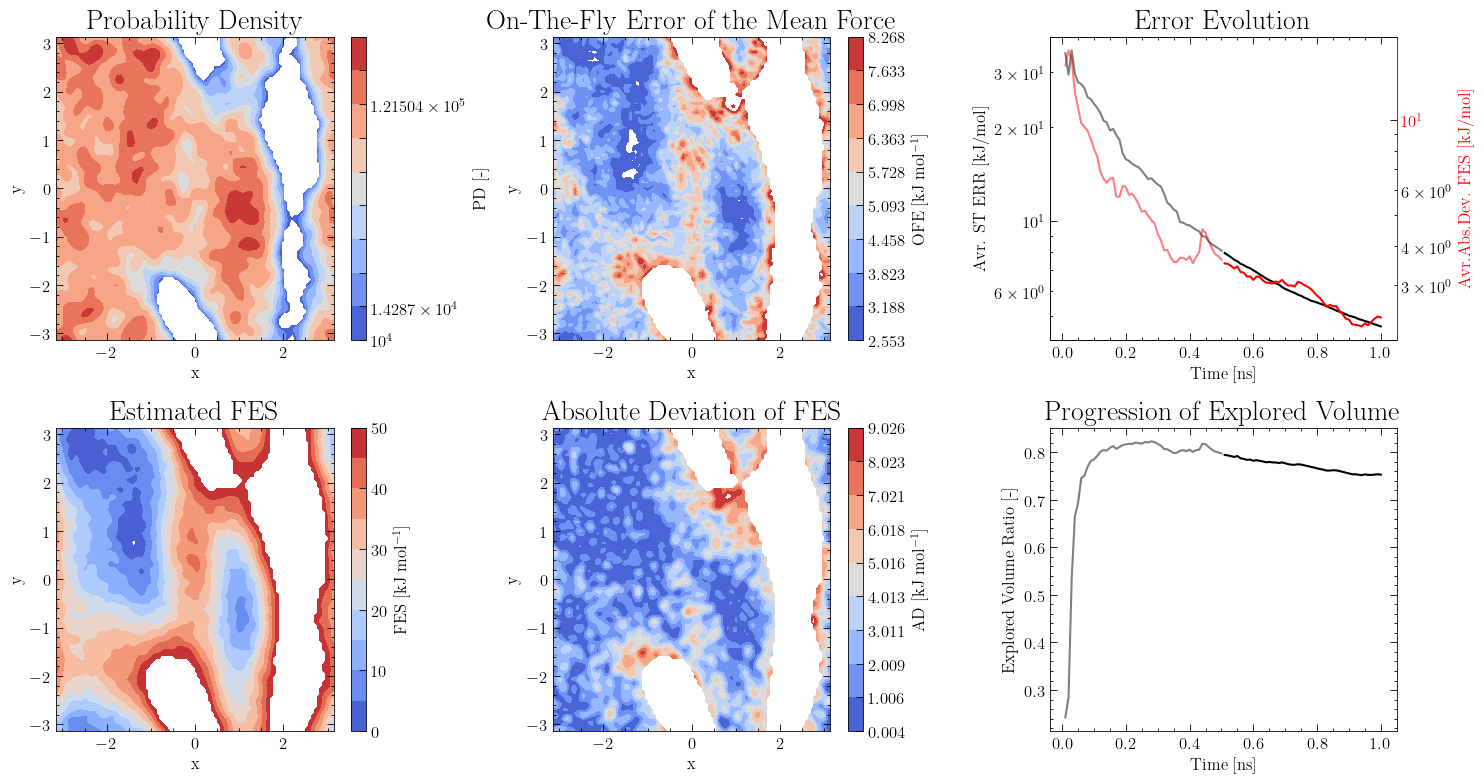

In [13]:
new_params = {**default_params}
new_params.update({"ID":"_2", "metad_height":3, "biasfactor":10, "metad_width":[0.1, 0.1]})
new_params.update({"Bias_sf":0.95, "gaus_filter_sigma":3})
new_params.update({"base_forces":MFI.force_terms, "base_time": MFI.sim_time})

MFI2 = MFI_class2D.MFI2D(**new_params)

MFI2.make_external_bias(FES=MFI.FES, bias_type="")

MFI2.run_simulation() 
# os.system("rm bck.* stats.out")

MFI2.analyse_data()

lib2.plot_hills_trajectory(MFI2.hills)

MFI2.plot_results(more_aofe=[t1, aofe1] , more_aad = [t1, aad1], more_vol=[t1, v1])
t2, v2, aofe2, aad2 = MFI2.Avr_Error_list[:,0], MFI2.Avr_Error_list[:,1], MFI2.Avr_Error_list[:,2], MFI2.Avr_Error_list[:, MFI2.Avr_Error_info.index("AAD")]


### 3rd Simulation

Make TPR file command:  gmx grompp -f /home/ucecabj/Desktop/MFI_git/MFI_class2D/gmx_files/Alanine_Dipeptide/gromppvac.mdp -c structure_new.gro -p /home/ucecabj/Desktop/MFI_git/MFI_class2D/gmx_files/Alanine_Dipeptide/topology.top -o input_new.tpr
Simulation started with Terminal input: gmx mdrun -s input_new.tpr -nsteps 500000 -plumed plumed.dat >/dev/null 2>&1

Running Alanine Dipeptide simulation: n_steps=500,000, ipos=-2.733,0.559, Pos_t=20, T=2.49, t_Tot=0.50ns
sigma=[0.05,0.05], h=3, bf=5, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 0.5ns | Total time: 1.0 min : 49 sec | Finished at 10:22:42                                                         

Alanine Dipeptide simulation finished in 1.0 min : 49 sec.
| 100% | AAD: 2.407 [kJ/mol] | Total time: 6 sec                                                            


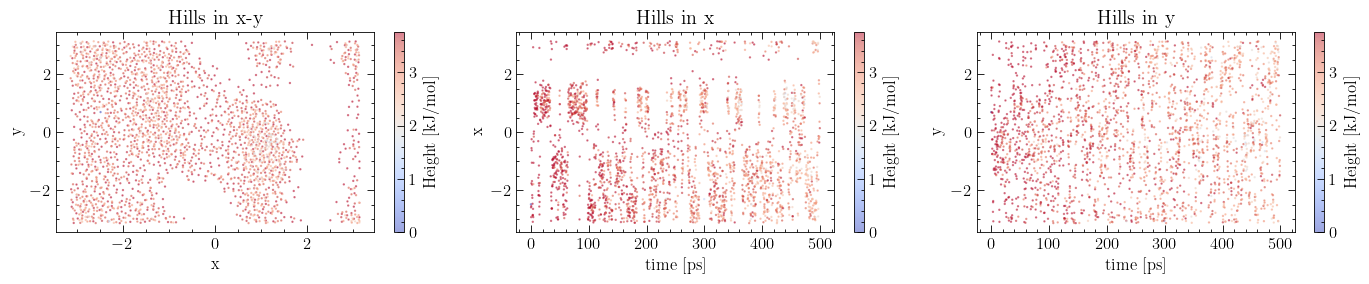

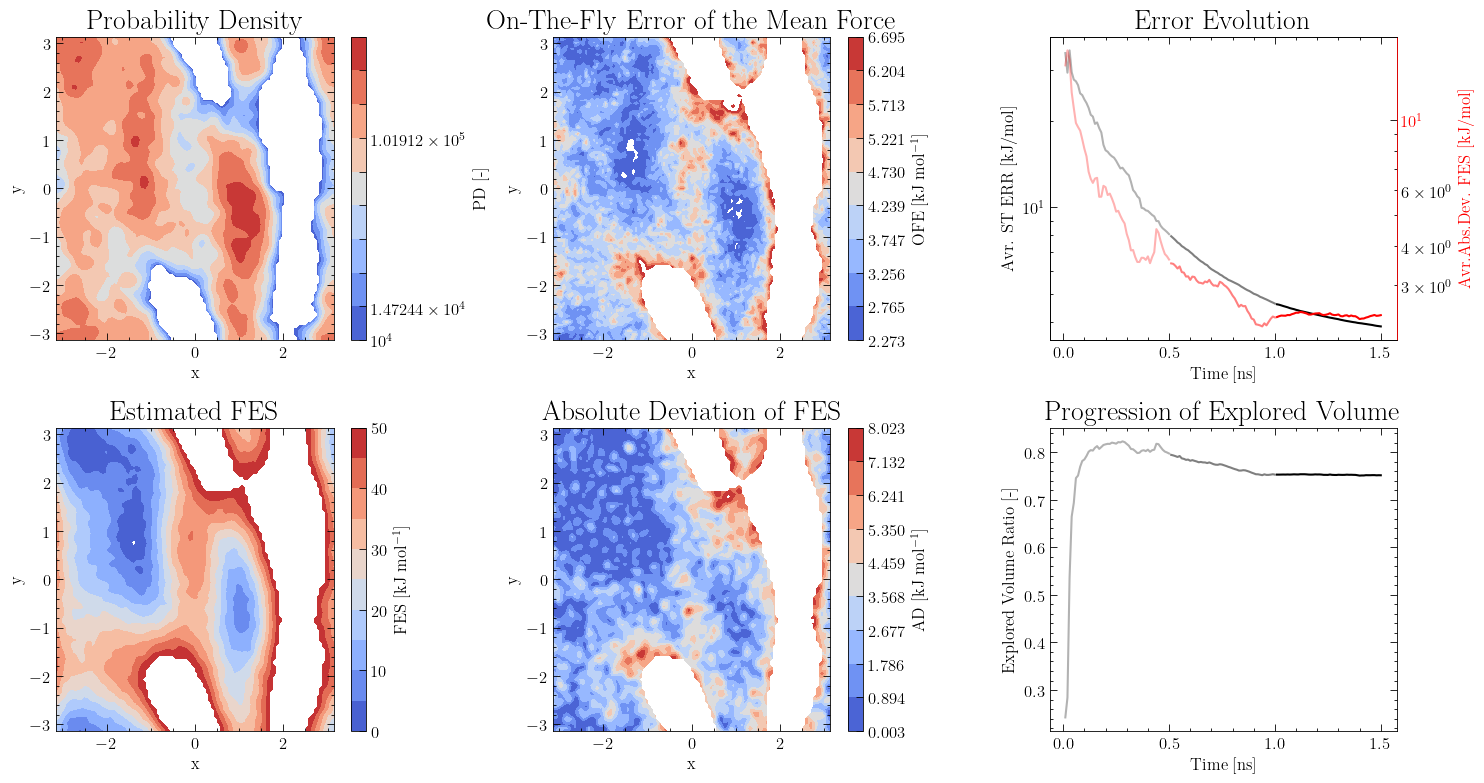

In [14]:
new_params = {**default_params}
new_params.update({"ID":"_3", "metad_height":3, "biasfactor":5, "metad_width":[0.05, 0.05]})
new_params.update({"Bias_sf":0.95, "gaus_filter_sigma":3})
new_params.update({"base_forces":lib2.patch_forces([MFI.force_terms, MFI2.force_terms]), "base_time": MFI.sim_time + MFI2.sim_time})

MFI3 = MFI_class2D.MFI2D(**new_params)

MFI3.make_external_bias(FES=MFI2.FES, bias_type="")

MFI3.run_simulation() 
# os.system("rm bck.* stats.out")

MFI3.analyse_data()

lib2.plot_hills_trajectory(MFI3.hills)

MFI3.plot_results(more_aofe=[[t1, aofe1], [t2, aofe2]] , more_aad = [[t1, aad1], [t2, aad2]], more_vol=[[t1, v1], [t2, v2]])
t3, v3, aofe3, aad3 = MFI3.Avr_Error_list[:,0], MFI3.Avr_Error_list[:,1], MFI3.Avr_Error_list[:,2], MFI3.Avr_Error_list[:, MFI3.Avr_Error_info.index("AAD")]


### 4th Simulation

Make TPR file command:  gmx grompp -f /home/ucecabj/Desktop/MFI_git/MFI_class2D/gmx_files/Alanine_Dipeptide/gromppvac.mdp -c structure_new.gro -p /home/ucecabj/Desktop/MFI_git/MFI_class2D/gmx_files/Alanine_Dipeptide/topology.top -o input_new.tpr
Simulation started with Terminal input: gmx mdrun -s input_new.tpr -nsteps 500000 -plumed plumed.dat >/dev/null 2>&1

Running Alanine Dipeptide simulation: n_steps=500,000, ipos=-2.381,0.17, Pos_t=20, T=2.49, t_Tot=0.50ns
sigma=[0.05,0.05], h=0.5, bf=3, Gaus_t=200
Static bias used: external_bias.dat 

| 100% | Simulated time: 0.5ns | Total time: 1.0 min : 48 sec | Finished at 10:25:16                                                         

Alanine Dipeptide simulation finished in 1.0 min : 48 sec.
| 100% | AAD: 2.366 [kJ/mol] | Total time: 6 sec                                                            


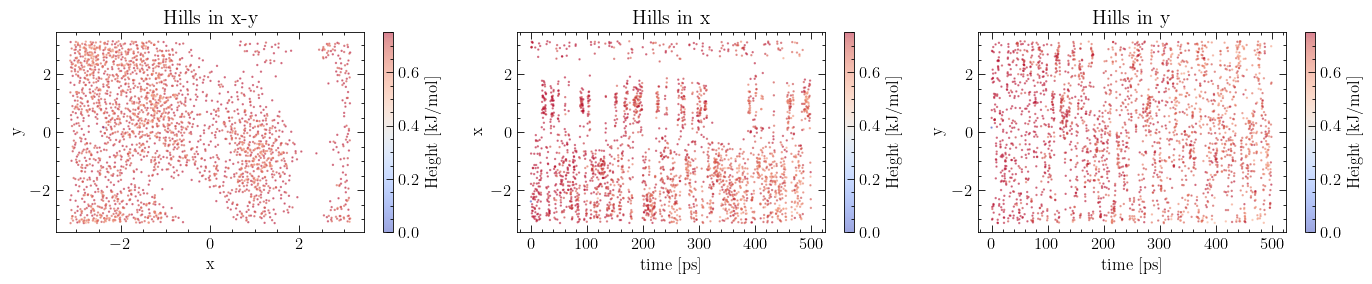

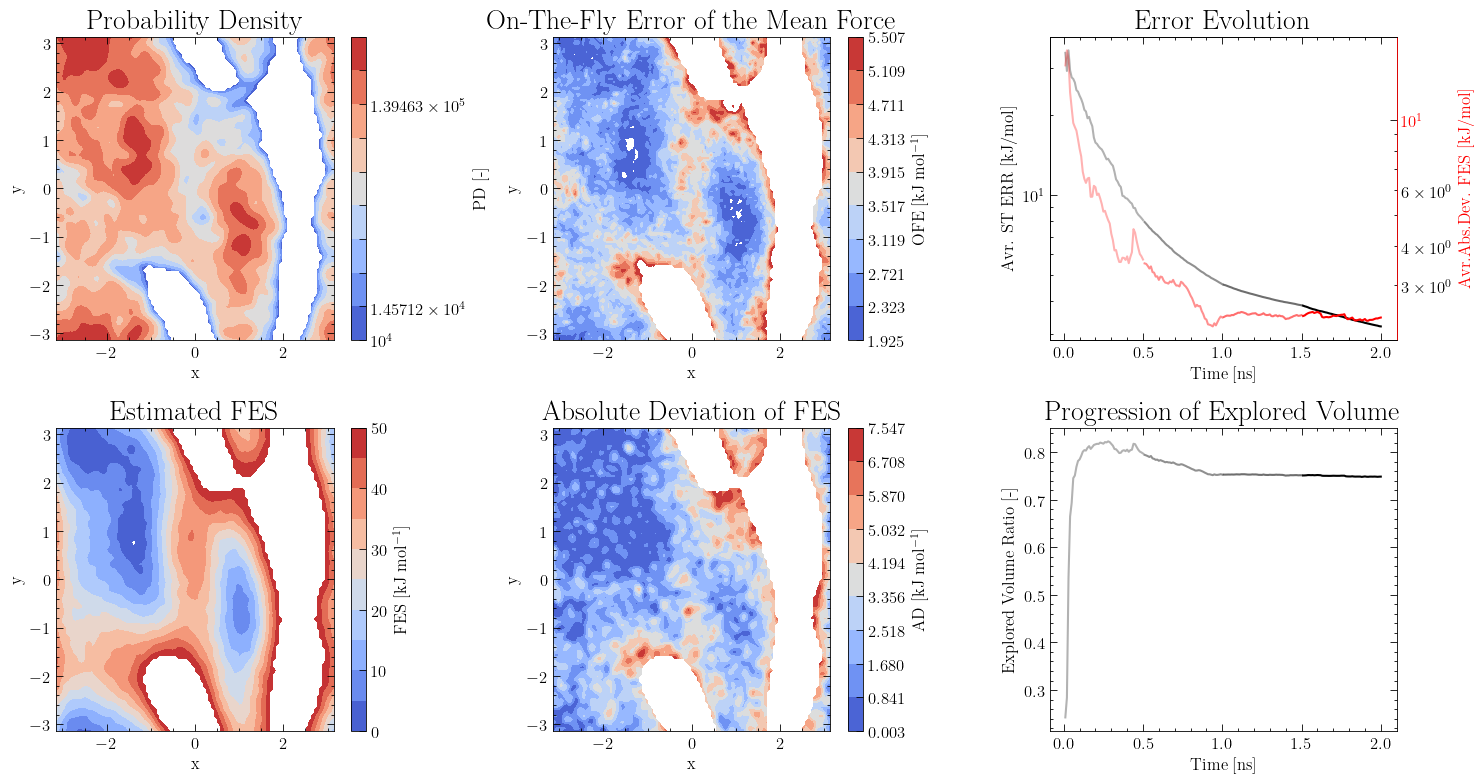

In [15]:
new_params = {**default_params}
new_params.update({"ID":"_4", "metad_height":0.5, "biasfactor":3, "metad_width":[0.05, 0.05]})
new_params.update({"Bias_sf":0.95, "gaus_filter_sigma":1})
new_params.update({"base_forces":lib2.patch_forces([MFI.force_terms, MFI2.force_terms, MFI3.force_terms]), "base_time": MFI.sim_time + MFI2.sim_time + MFI3.sim_time})

MFI4 = MFI_class2D.MFI2D(**new_params)

MFI4.make_external_bias(FES=MFI3.FES, bias_type="")

MFI4.run_simulation() 
# os.system("rm bck.* stats.out")

MFI4.analyse_data()

lib2.plot_hills_trajectory(MFI4.hills)

MFI4.plot_results(more_aofe=[[t1, aofe1],[t2,aofe2],[t3,aofe3]] , more_aad = [[t1, aad1], [t2, aad2],[t3, aad3]], more_vol=[[t1, v1], [t2, v2], [t3, v3]])
t4, v4, aofe4, aad4 = MFI4.Avr_Error_list[:,0], MFI4.Avr_Error_list[:,1], MFI4.Avr_Error_list[:,2], MFI4.Avr_Error_list[:, MFI4.Avr_Error_info.index("AAD")]
